In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

# To add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('../scripts')))

# Now you can import your module
from my_data_preprocessing_script import info_col, clean_data


In [10]:
# Loading the .dta file
df = pd.read_stata('../Mendeley - Fintech & Macroeconomics/P2P_Macro_Data.dta') #raw file, available by following the link in the README.md file

# Displaying the first few rows of the dataframe
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status_5,meanopen_acc,FED_lag6,riskprem,loan_vol6m,loglvol_6m,issue_daily,issue_year,loan6m_median,loan_sum
0,11875,11875,11875.0,36 months,0.1531,413.459991,C,C2,North Slope Borough,2 years,...,0,11.0,0.11,3.2075,321075.0,12.679430,2012-08-01,2012.0,17885976.0,4.162437e+10
1,11500,11500,11500.0,36 months,0.1849,418.589996,D,D2,"Ulmers Burgess, Inc",1 year,...,0,11.0,0.11,3.2075,321075.0,12.679430,2012-08-01,2012.0,17885976.0,4.162437e+10
2,2300,2300,2300.0,36 months,0.0890,73.040001,A,A5,Metlakatla Indian Community,10+ years,...,0,11.0,0.11,3.2075,192200.0,12.166292,2012-09-01,2012.0,17885976.0,4.162437e+10
3,19600,19600,19600.0,36 months,0.1409,670.739990,B,B5,USAF,7 years,...,6,11.0,0.09,3.2150,192200.0,12.166292,2012-09-01,2012.0,17885976.0,4.162437e+10
4,3900,3900,3900.0,36 months,0.1311,131.619995,B,B4,US Army,7 years,...,6,11.0,0.09,3.2150,192200.0,12.166292,2012-09-01,2012.0,17885976.0,4.162437e+10


In [11]:
info_col(df).head(30)

df shape: (2703430, 195)


,Data type,Number of unique values,Missing values
verification_status_joint,float64,0,100.000000
url,float64,0,100.000000
revol_bal_joint,float64,73688,93.467521
sec_app_open_act_il,float64,41,93.467484
dti_joint,float32,4030,93.001335
annual_inc_joint,float64,25069,93.001187
mths_since_last_record,float64,128,84.858273
lognum_accts_ever_120_pd,float32,46,77.599753
mths_since_recent_bc_dlq,float64,183,77.012536
mths_since_last_major_derog,float64,188,74.371891


In [12]:
status_mapping = {'Fully Paid': 0, 'Charged Off': 1, 'Default': 1, 'Late (31-120 days)': 1}
df = df[df['loan_status'].isin(status_mapping.keys())].copy()
df['loan_status_target_variable'] = df['loan_status'].map(status_mapping)

In [13]:
# suppress missing values 
missing_value_percentage = df.isnull().mean() * 100

# Creating a mask for columns with more than 10% missing values
columns_to_drop = missing_value_percentage[missing_value_percentage > 10].index
df = df.drop(columns=columns_to_drop)

# PERSONAL AND LOAN DETAILS FEATURES

In [14]:
### CHECKING FOR UNNECESSARY FEATURES THAT APPEAR TO NOT HAVE SIGNIFICANT PREDICTIVE POWER.

Text(0.5, 0.98, 'Distribution of classes in each feature')

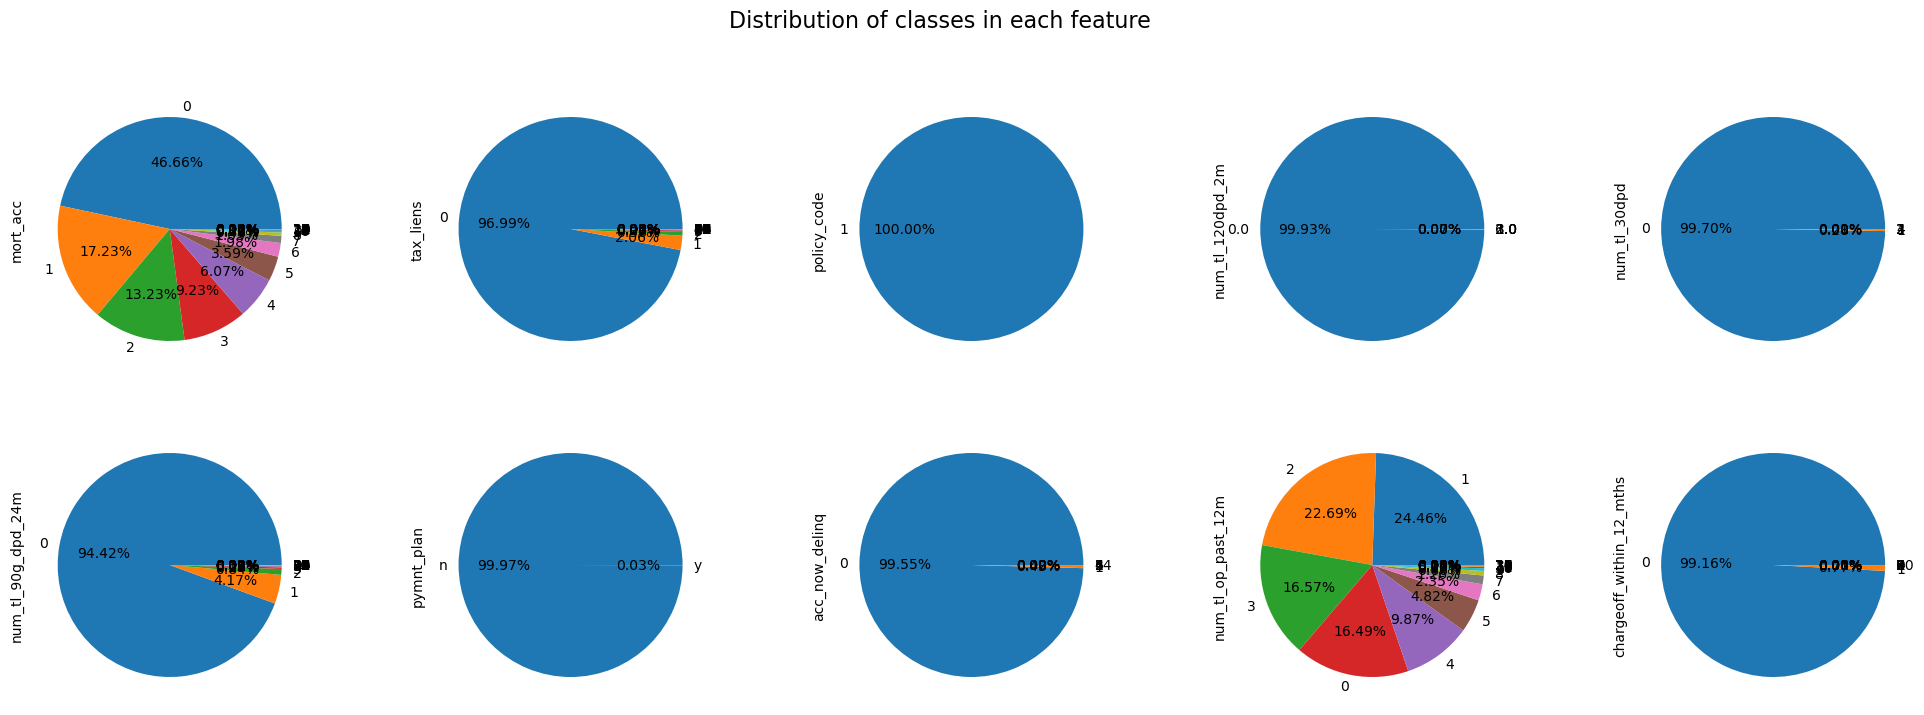

In [11]:
fig, axs = plt.subplots(2, 5, figsize=(25, 8))
# 1st row
df.loc[df['loan_status']=='Charged Off']['mort_acc'].value_counts().plot.pie(ax=axs[0,0], autopct='%.2f%%')
df['tax_liens'].value_counts().plot.pie(ax=axs[0,1],autopct='%.2f%%')
df['policy_code'].value_counts().plot.pie(ax=axs[0,2],autopct='%.2f%%')
df['num_tl_120dpd_2m'].value_counts().plot.pie(ax=axs[0,3],autopct='%.2f%%')
df['num_tl_30dpd'].value_counts().plot.pie(ax=axs[0,4],autopct='%.2f%%')
# 2ns row
df['num_tl_90g_dpd_24m'].value_counts().plot.pie(ax=axs[1,0],autopct='%.2f%%')
df['pymnt_plan'].value_counts().plot.pie(ax=axs[1,1],autopct='%.2f%%')
df['acc_now_delinq'].value_counts().plot.pie(ax=axs[1,2],autopct='%.2f%%')
df['num_tl_op_past_12m'].value_counts().plot.pie(ax=axs[1,3],autopct='%.2f%%')
df['chargeoff_within_12_mths'].value_counts().plot.pie(ax=axs[1,4],autopct='%.2f%%')
# set title
fig.suptitle('Distribution of classes in each feature', fontsize=16)

In [15]:
# Deleting unnecessary columns : without predictive power
df = df.drop(columns=['policy_code', 'pymnt_plan', 'acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd'])

### - SELECTING THE FEATURES TO KEEP

From paper:
**The initial dataset contained a wide array of features, including borrower-specific details like employment length and income, loan characteristics such as amount and term, and macroeconomic indicators. The initial task was to understand the distribution and impact of each feature on the loan status (e.g., fully paid, charged off) through preliminary exploratory data analysis, correlation matrices and pie charts to visualize categorical distributions. We also relied on domain knowledge, and existing research into the best predictors in P2P credit scoring.**

In [16]:
categorical_features = ['application_type', 'term_clean', 'purpose', 'initial_list_status', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'addr_state']
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'loan_date_days_from_reference', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'num_tl_op_past_12m', 'tot_cur_bal', 'avg_cur_bal', 'mort_acc', 'num_sats', 'num_accts_ever_120_pd', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens']
list_features = list(categorical_features + numerical_features)
print('Num features Base:', len(list_features))


macro_list_2 = ['gdpreal','gdpcontrib', 'cpi', 'inf', 'CPIUS', 'FEDFUNDS', 'riskprem', 'logearnings', 'loginternetuser', 'logempl_expan', 'logempl_birth', 'lognew_bus', 'logpopestimate', 'logunemployment', 'internetuser', 'internetuserprop', 'empl_exp_prop', 'empl_birth', 'new_bus', 'popestimate', 'unemployment', 'muni_6m', 'unem_rate', 'muni_m', 'muni_points', 'gdppercap' ]
print('Num features Macro', len(macro_list_2))
print('Num features Total:', len(list_features + macro_list_2))

Num features Base: 29
Num features Macro 26
Num features Total: 55


In [17]:
dependent_variable = ['loan_status_target_variable']

In [18]:
df = clean_data(df)

Called functions: 
        - clean_term (term_clean)
        - normalize_application_type
        - clean_revol_util
        - clean_employment_length
        - consolidate_home_ownership
        - convert_issue_date_to_days_from_reference
        - handle_missing_emp_length
        - handle_missing_num_accts_ever_120_pd
        - fill_bc_util
        - drop_missing_column
        - drop_missing_data

Dataframe cleaned, Dataframe shape: (821795, 171)


In [19]:
info_col(df[list_features + macro_list_2]).head(56)

df shape: (821795, 55)


,Data type,Number of unique values,Missing values
application_type,object,2,0.0
logpopestimate,float32,246,0.0
gdpcontrib,float64,180,0.0
cpi,float64,449,0.0
inf,float32,1113,0.0
CPIUS,float64,94,0.0
FEDFUNDS,float64,35,0.0
riskprem,float64,8,0.0
logearnings,float32,2948,0.0
loginternetuser,float32,1147,0.0


In [20]:
df[df['loan_status'].isin(['Current'])]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,riskprem,loan_vol6m,loglvol_6m,issue_year,loan6m_median,loan_sum,loan_status_target_variable,term_clean,loan_date,loan_date_days_from_reference


In [21]:
df = df[list_features+dependent_variable+macro_list_2].copy()
print(df.shape)
info_col(df).head(30)

(821795, 56)
df shape: (821795, 56)


,Data type,Number of unique values,Missing values
application_type,object,2,0.0
term_clean,int64,2,0.0
gdpreal,int32,996,0.0
gdpcontrib,float64,180,0.0
cpi,float64,449,0.0
inf,float32,1113,0.0
CPIUS,float64,94,0.0
FEDFUNDS,float64,35,0.0
riskprem,float64,8,0.0
logearnings,float32,2948,0.0


<Axes: >

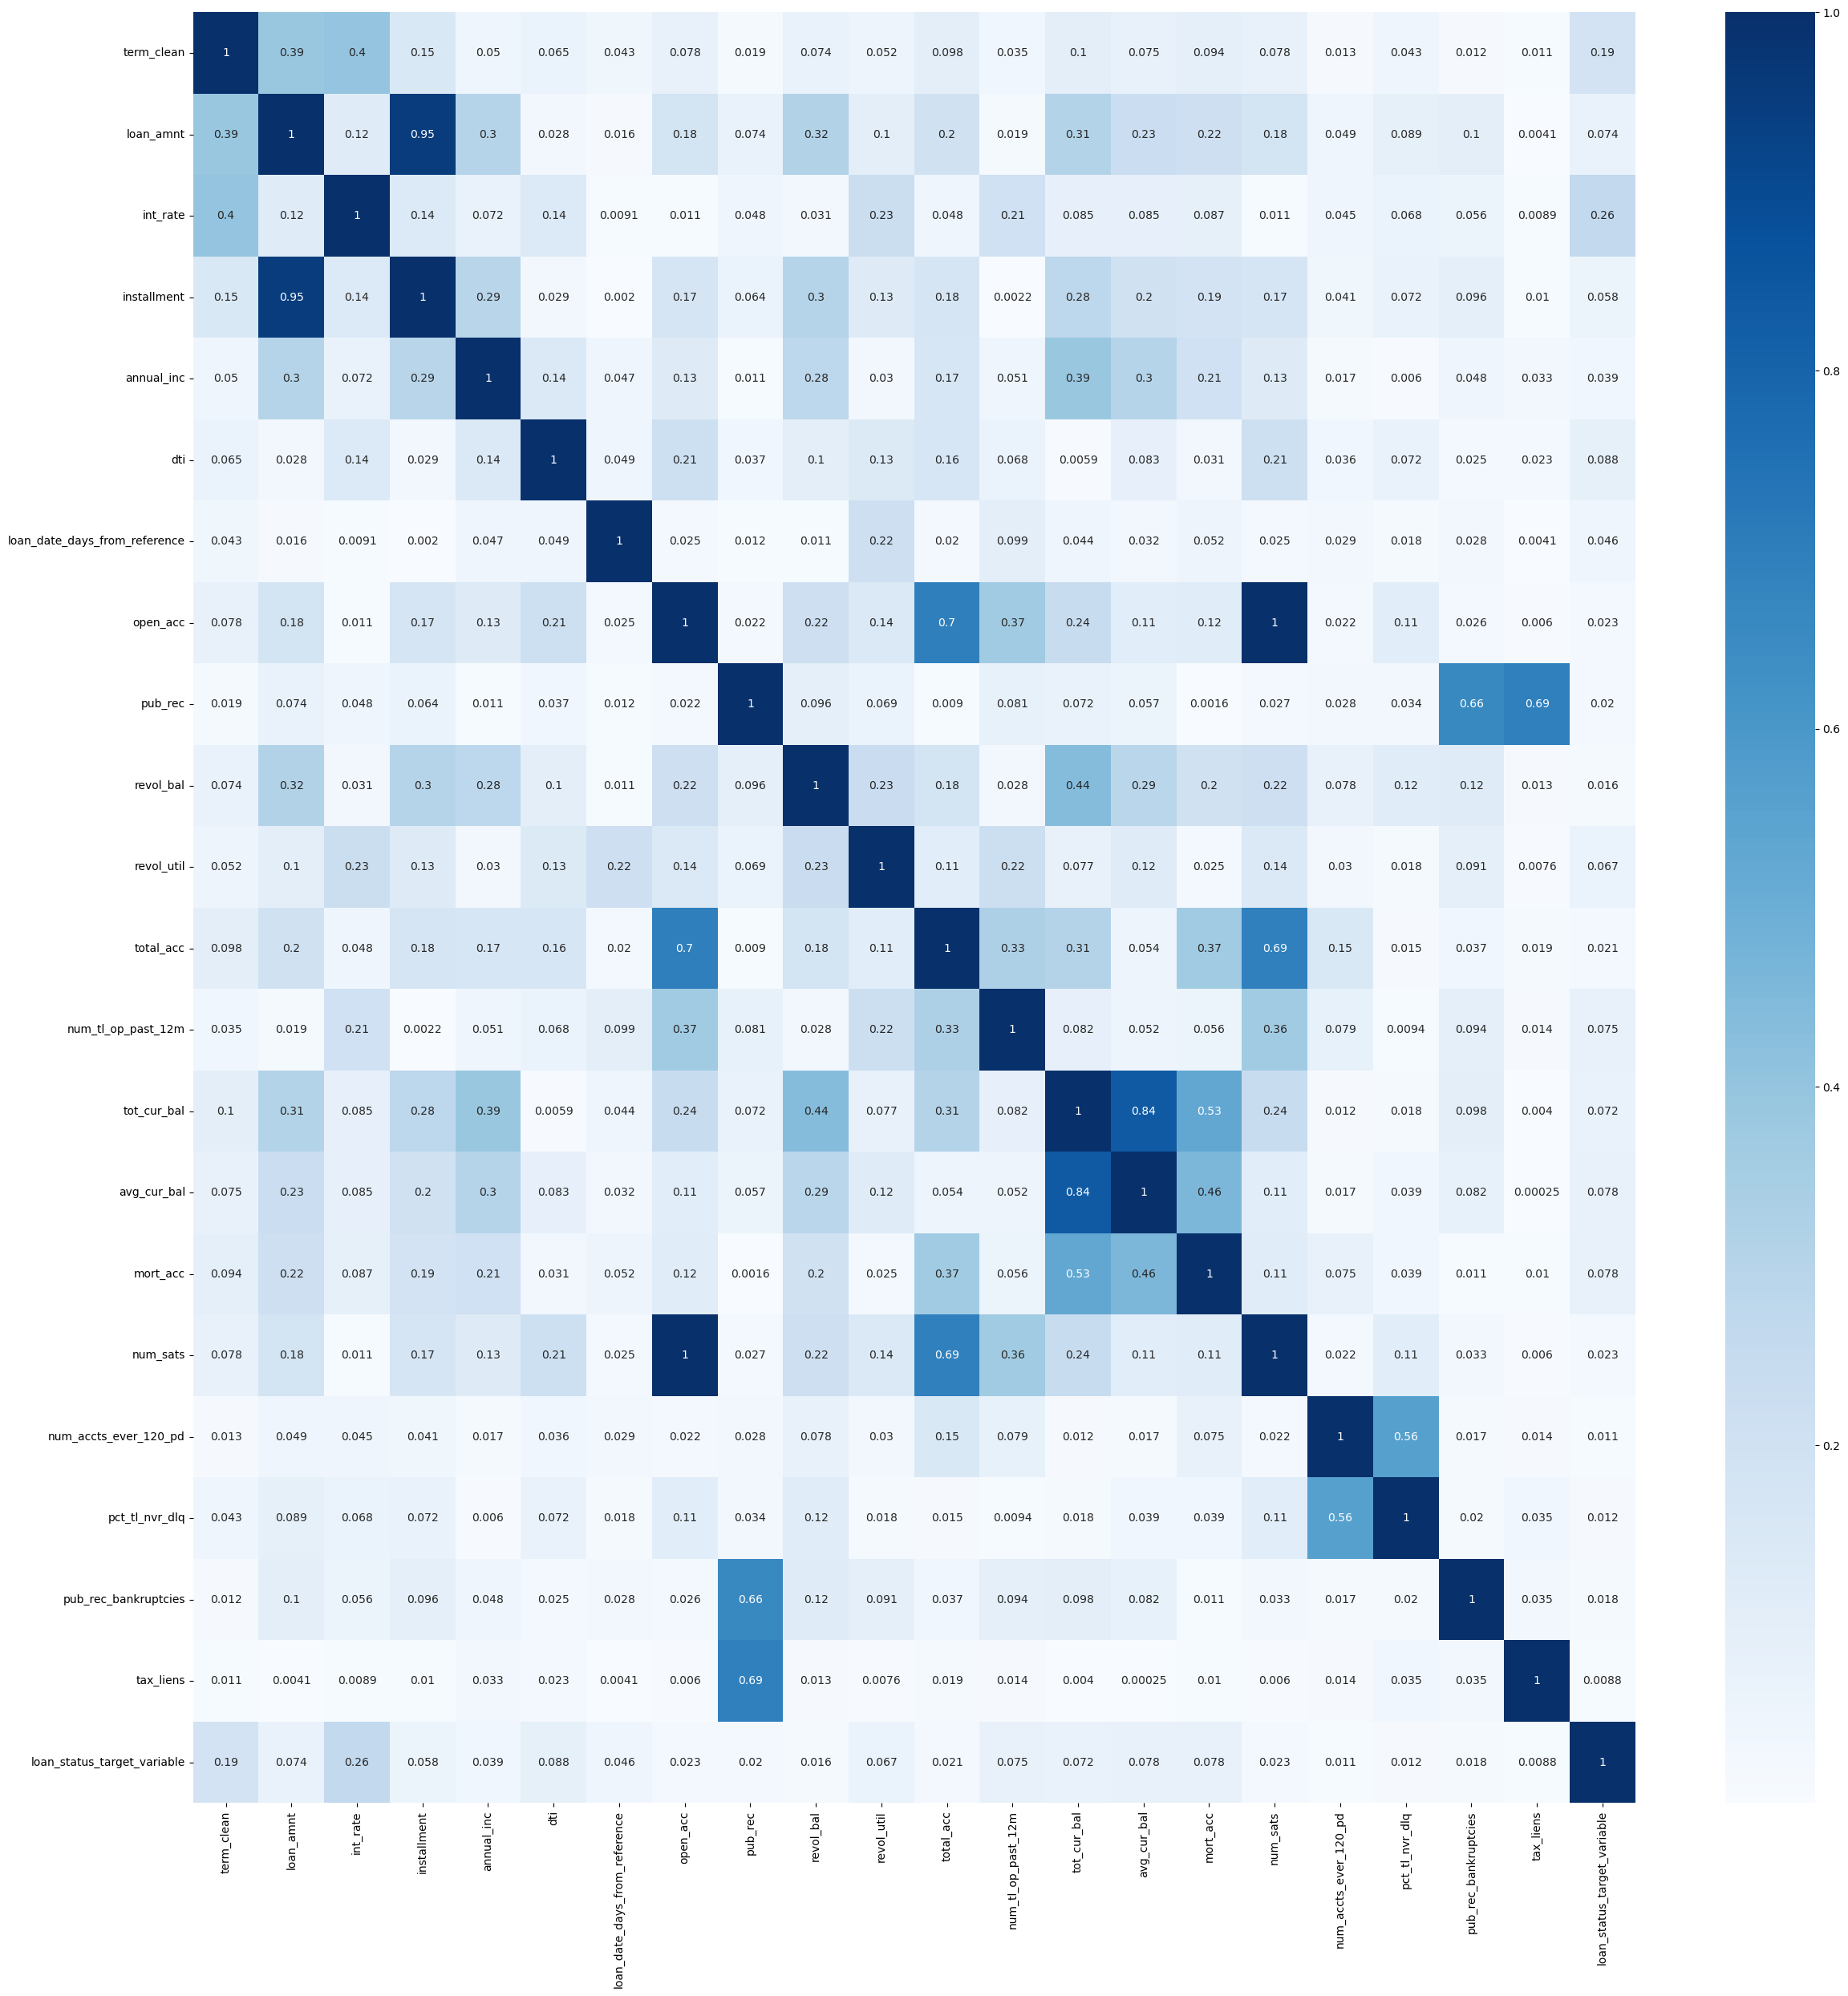

In [216]:
correlation_matrix_base = df[list_features+dependent_variable].select_dtypes(include='number').corr().abs()
plt.figure(figsize=(29,29)) 
sns.heatmap(correlation_matrix_base, annot=True, cmap="Blues")

In [217]:
# filter out the pair of features with correlation score larger than 0.7
correlation_matrix_base[correlation_matrix_base>0.7].unstack().transpose().sort_values(ascending=False).drop_duplicates()

term_clean   term_clean     1.000000
open_acc     num_sats       0.998758
installment  loan_amnt      0.952671
tot_cur_bal  avg_cur_bal    0.836607
term_clean   loan_amnt           NaN
dtype: float64

In [22]:
df = df.drop(columns=['installment', 'open_acc', 'tot_cur_bal'])

In [23]:
df.duplicated(keep='first').sum()

0

There are no dupplcated rows in the dataset

In [224]:
numerical_features = [element for element in numerical_features if element in df.columns]

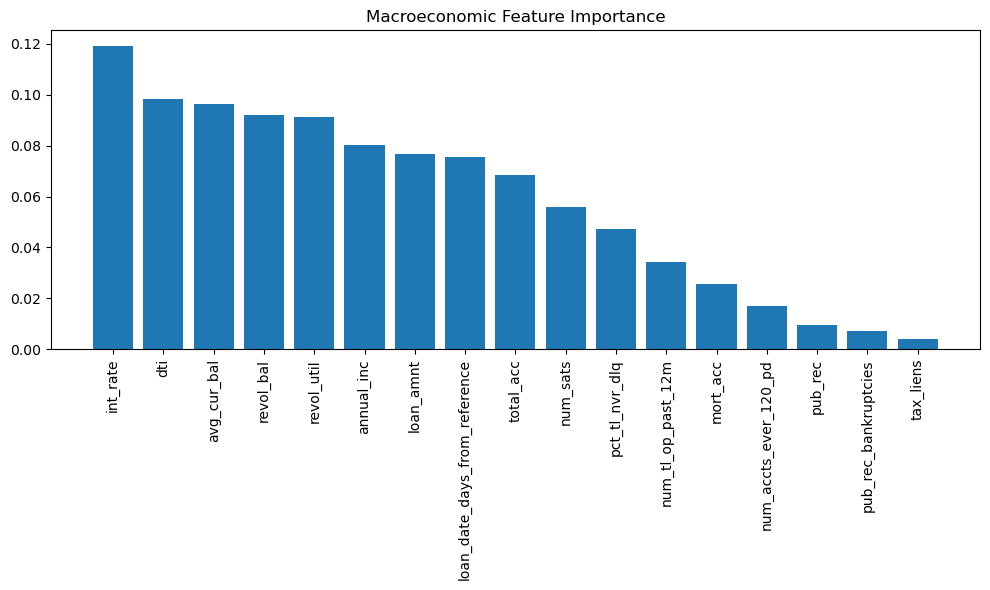

In [225]:
from sklearn.ensemble import RandomForestClassifier

# Fit model
model_num_base = RandomForestClassifier()
model_num_base.fit(df[numerical_features], df['loan_status_target_variable'])

# Feature importance
importances_base = model_num_base.feature_importances_
indices_base = np.argsort(importances_base)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title('Base Feature Importance')
plt.bar(range(df[numerical_features].shape[1]), importances_base[indices_base], align='center')
plt.xticks(range(df[numerical_features].shape[1]), df[numerical_features].columns[indices_base], rotation=90)
plt.tight_layout()
plt.show()

In [8]:
if 'tax_liens' in numerical_features:
    numerical_features.remove('tax_liens')
    df = df.drop(columns=['tax_liens'])

NameError: name 'numerical_features' is not defined

In [232]:
# List of personal features except those in macro_list
base_features = df.columns.difference(macro_list_2).tolist()
print('Num base features (personal & loan details):', len(base_features))
base_features

Num base features (personal & loan details): 26


['addr_state',
 'annual_inc',
 'application_type',
 'avg_cur_bal',
 'dti',
 'grade',
 'home_ownership',
 'initial_list_status',
 'int_rate',
 'loan_amnt',
 'loan_date_days_from_reference',
 'loan_status_target_variable',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_sats',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term_clean',
 'total_acc',
 'verification_status']

# MACRO DATA

In [235]:
# List of macro features
# First iteration
macro_list = ['gdpreal','gdpcontrib', 'cpi', 'inf', 'CPIUS', 'FEDFUNDS', 'riskprem', 'logearnings', 'loginternetuser', 'logempl_expan', 'logempl_birth', 'lognew_bus', 'logpopestimate', 'logunemployment', 'internetuser', 'internetuserprop', 'empl_exp_prop', 'empl_birth', 'new_bus', 'popestimate', 'unemployment', 'muni_6m']
print('Num macro features:', len(macro_list))
df.shape

Num macro features: 22


(974317, 52)

In [236]:
df[macro_list].isnull().sum()

gdpreal             0
gdpcontrib          0
cpi                 0
inf                 0
CPIUS               0
FEDFUNDS            0
riskprem            0
logearnings         0
loginternetuser     0
logempl_expan       0
logempl_birth       0
lognew_bus          0
logpopestimate      0
logunemployment     0
internetuser        0
internetuserprop    0
empl_exp_prop       0
empl_birth          0
new_bus             0
popestimate         0
unemployment        0
muni_6m             0
dtype: int64

In [237]:
df.dropna(subset=macro_list, inplace=True)

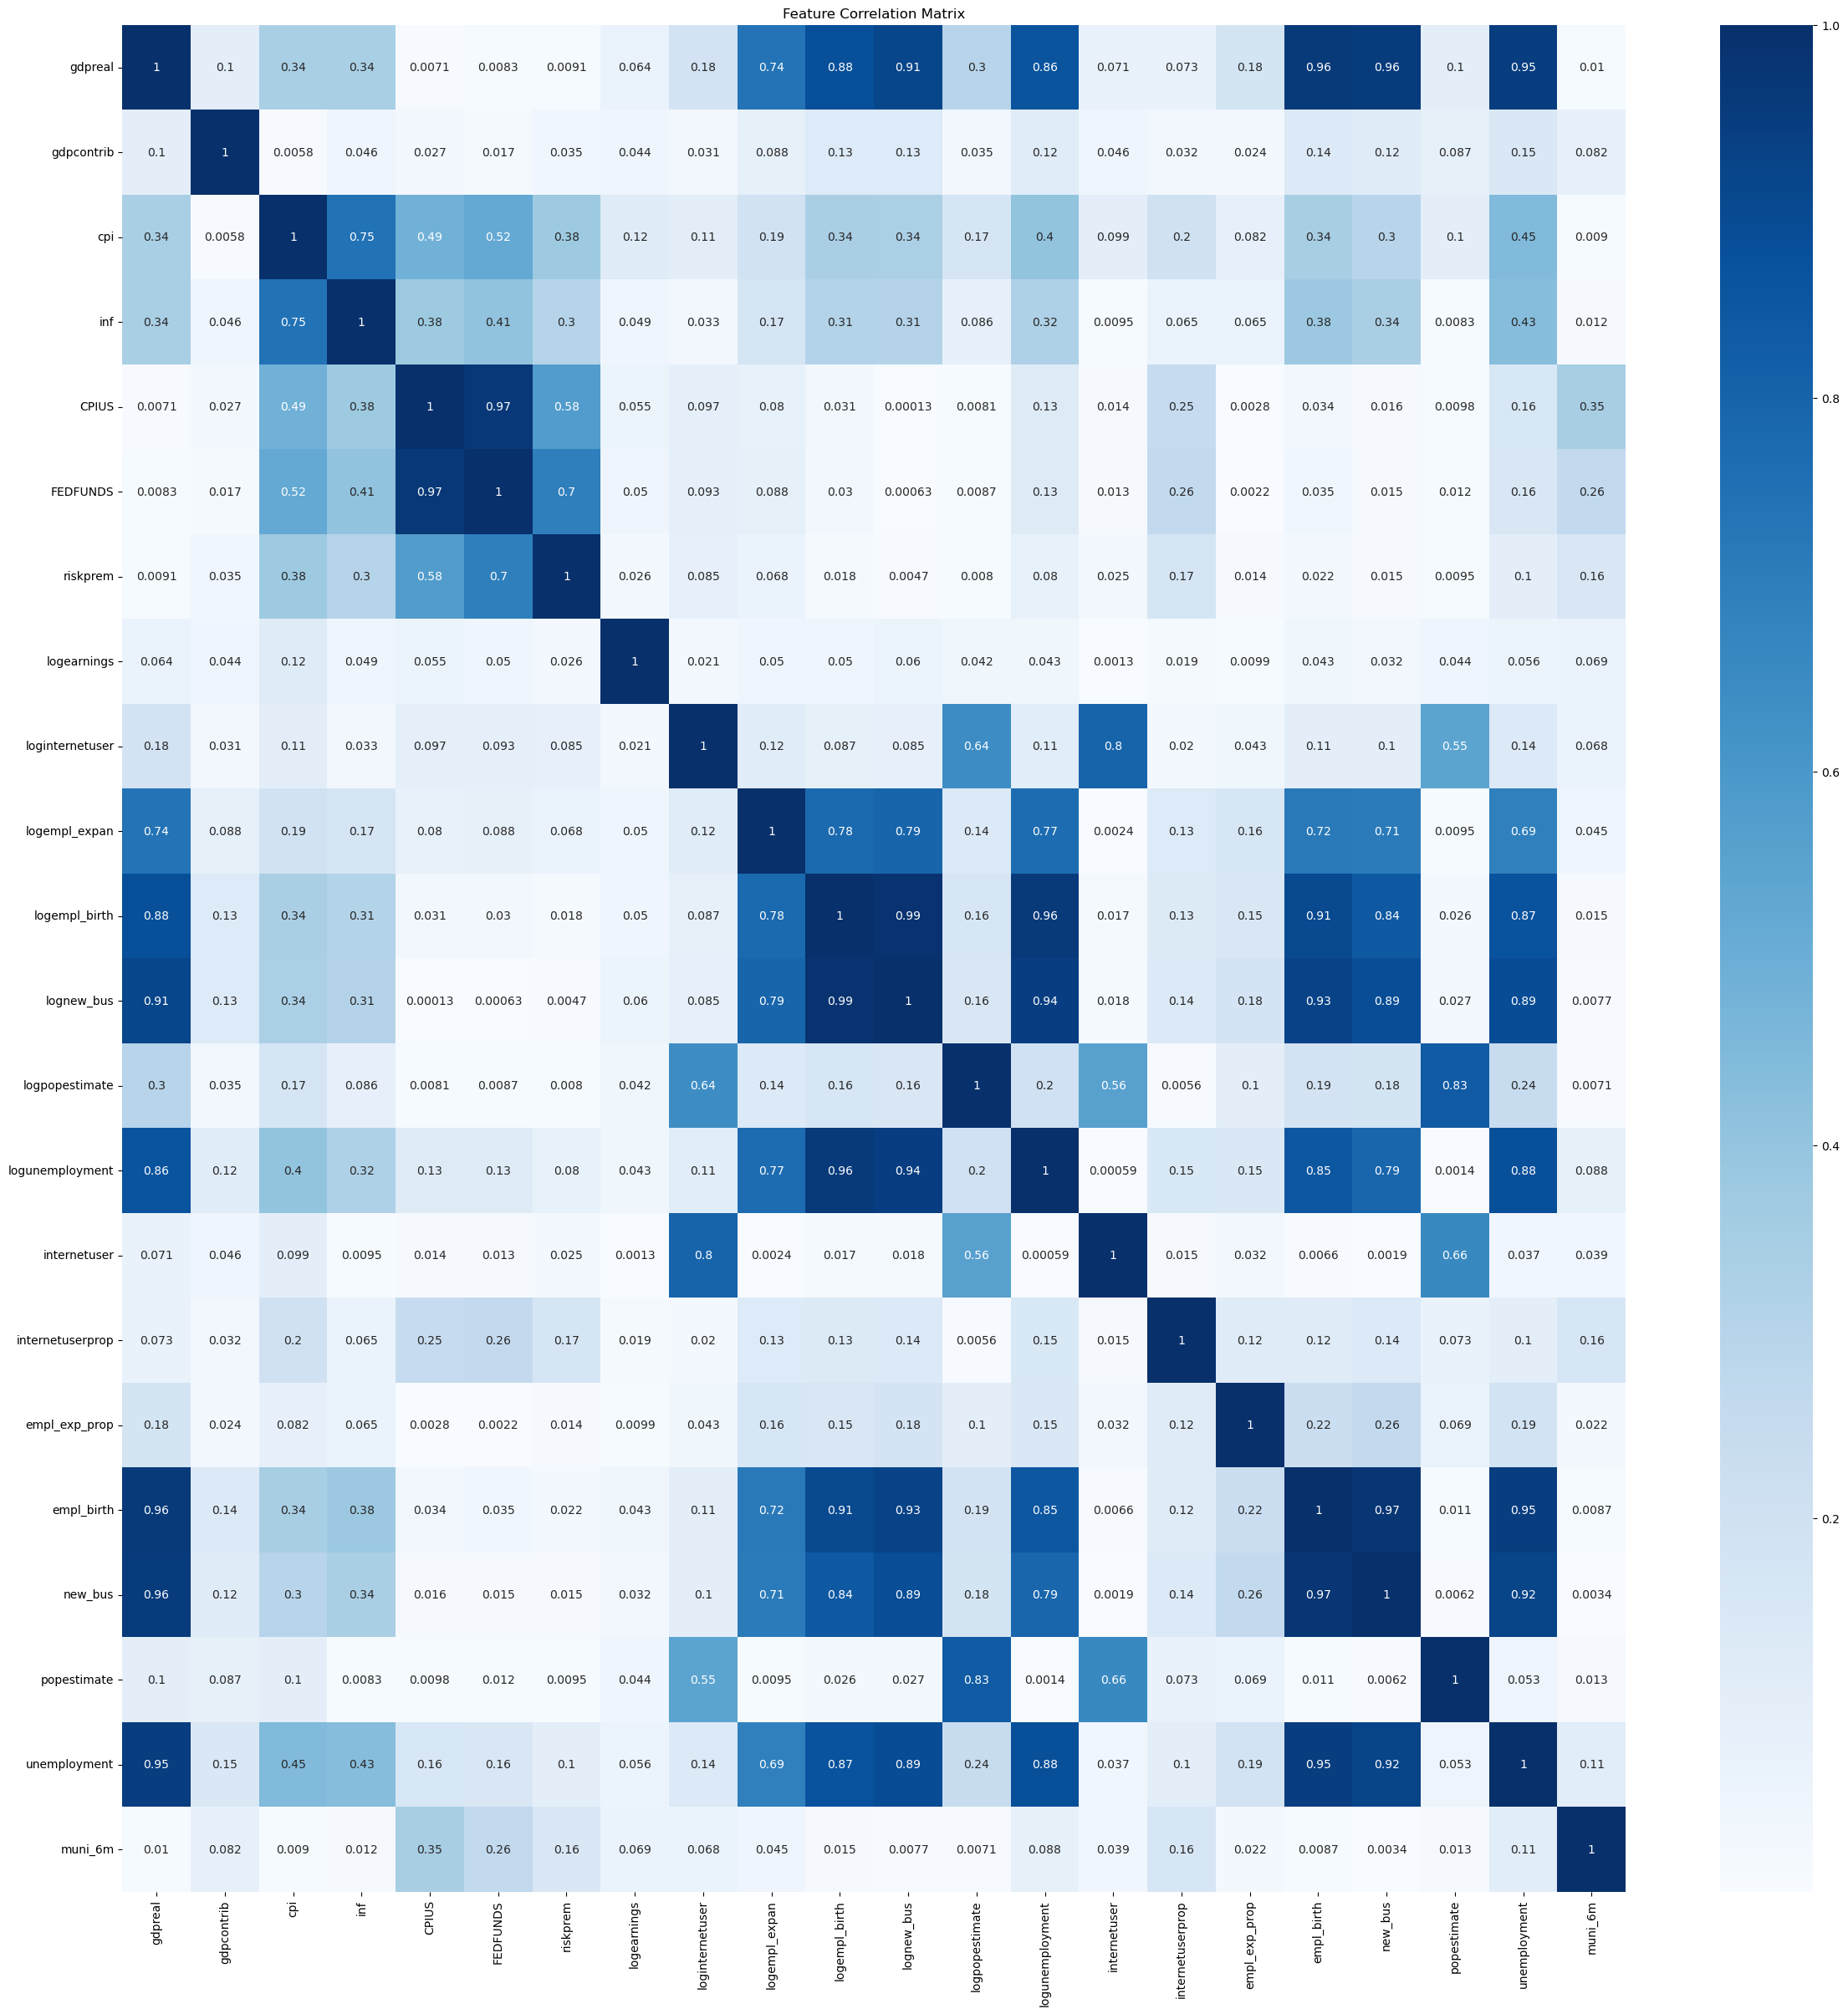

Highly correlated variables: [('gdpreal', 'logempl_expan'), ('gdpreal', 'logempl_birth'), ('gdpreal', 'lognew_bus'), ('gdpreal', 'logunemployment'), ('gdpreal', 'empl_birth'), ('gdpreal', 'new_bus'), ('gdpreal', 'unemployment'), ('cpi', 'inf'), ('CPIUS', 'FEDFUNDS'), ('loginternetuser', 'internetuser'), ('logempl_expan', 'logempl_birth'), ('logempl_expan', 'lognew_bus'), ('logempl_expan', 'logunemployment'), ('logempl_expan', 'empl_birth'), ('logempl_expan', 'new_bus'), ('logempl_birth', 'lognew_bus'), ('logempl_birth', 'logunemployment'), ('logempl_birth', 'empl_birth'), ('logempl_birth', 'new_bus'), ('logempl_birth', 'unemployment'), ('lognew_bus', 'logunemployment'), ('lognew_bus', 'empl_birth'), ('lognew_bus', 'new_bus'), ('lognew_bus', 'unemployment'), ('logpopestimate', 'popestimate'), ('logunemployment', 'empl_birth'), ('logunemployment', 'new_bus'), ('logunemployment', 'unemployment'), ('empl_birth', 'new_bus'), ('empl_birth', 'unemployment'), ('new_bus', 'unemployment')]


In [238]:
# Correlation matrix
correlation_matrix_macro_1 = df[macro_list].select_dtypes(include='number').corr().abs()

# Plotting the correlation matrix
plt.figure(figsize=(29, 29))
sns.heatmap(correlation_matrix_macro_1[macro_list], annot=True, cmap='Blues')
plt.title('Feature Correlation Matrix')
plt.show()

# Identifying features with high multicollinearity
high_corr_var = np.where(np.abs(correlation_matrix_macro_1) > 0.70)
high_corr_var = [(correlation_matrix_macro_1.columns[x], correlation_matrix_macro_1.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly correlated variables:", high_corr_var)


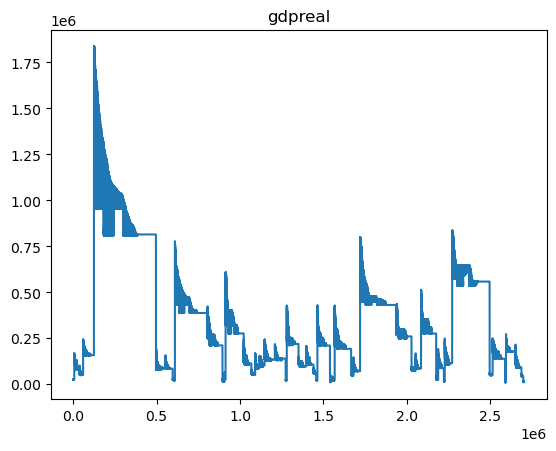

0    23782.0
1    23782.0
2    23782.0
3    25575.0
4    25576.0
Name: unemployment, dtype: float32

In [239]:
# plot gdpreal
df['unemployment'].plot(kind='line', title='gdpreal')
plt.show()
df['unemployment'].head()

In [240]:
correlation_matrix_macro_1[correlation_matrix_macro_1>0.7].unstack().transpose().sort_values(ascending=False).drop_duplicates()

gdpreal          gdpreal            1.000000
logempl_birth    lognew_bus         0.987262
empl_birth       new_bus            0.973624
CPIUS            FEDFUNDS           0.968145
logunemployment  logempl_birth      0.960239
empl_birth       gdpreal            0.957780
new_bus          gdpreal            0.955470
unemployment     empl_birth         0.948673
gdpreal          unemployment       0.948019
lognew_bus       logunemployment    0.944508
                 empl_birth         0.929050
new_bus          unemployment       0.922768
lognew_bus       gdpreal            0.914192
logempl_birth    empl_birth         0.905679
lognew_bus       unemployment       0.891856
new_bus          lognew_bus         0.889823
unemployment     logunemployment    0.881232
gdpreal          logempl_birth      0.880748
logempl_birth    unemployment       0.870426
logunemployment  gdpreal            0.861103
                 empl_birth         0.850555
new_bus          logempl_birth      0.840053
logpopesti

In [241]:
#df.drop(['lognew_bus', 'new_bus','empl_birth', 'FEDFUNDS', 'logempl_birth', 'unemployment', 'logsocialnetworkuser'], axis=1, inplace=True)
macro_list_to_remove = ['lognew_bus', 'new_bus','empl_birth', 'FEDFUNDS', 'logempl_birth', 'logsocialnetworkuser', 'loginternetuser', 'gdpreal', 'unemployment' 'popestimate', 'cpi', 'unemployment']
# droping above columns as they are highly correlated with other columns, also dropping them from macro_list
macro_list = [element for element in macro_list if element not in macro_list_to_remove]
len(macro_list)

13

In [242]:
y_train = df['loan_status_target_variable']

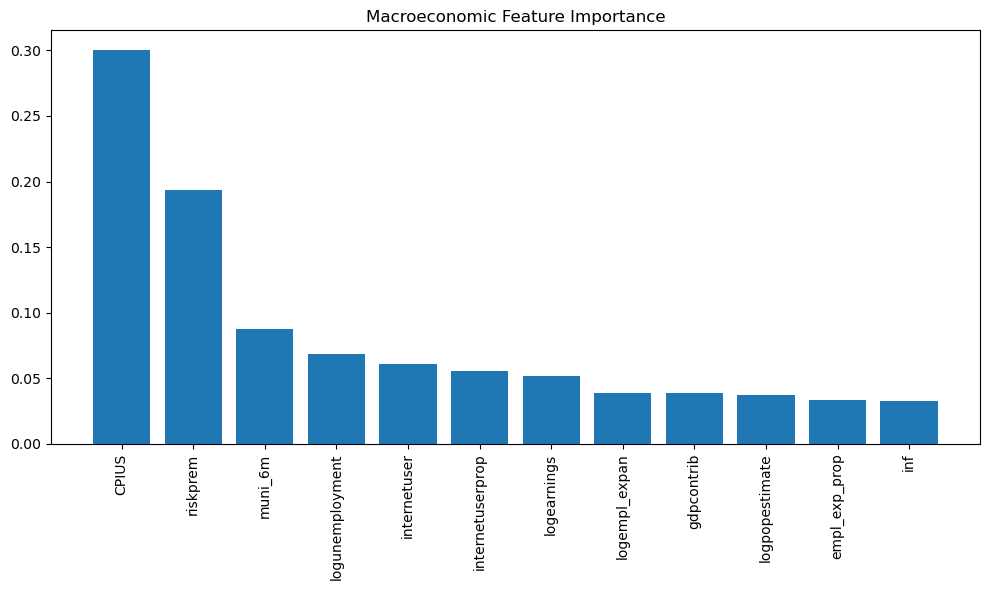

In [133]:
from sklearn.ensemble import RandomForestClassifier

# Fit model
model = RandomForestClassifier()
model.fit(df[macro_list], y_train)

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title('Macroeconomic Feature Importance')
plt.bar(range(df[macro_list].shape[1]), importances[indices], align='center')
plt.xticks(range(df[macro_list].shape[1]), df[macro_list].columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
### SECOND ITERATION MACRO SELECTION

In [271]:
macro_list_2 = ['gdpreal','gdpcontrib', 'gdppercap', 'cpi', 'inf', 'CPIUS', 'FEDFUNDS', 'riskprem', 'logearnings', 'logsocialnetworkuser', 'loginternetuser', 'logempl_expan', 'logempl_birth', 'lognew_bus', 'logpopestimate', 'logunemployment', 'internetuser', 'internetuserprop', 'empl_exp_prop', 'empl_birth', 'new_bus', 'popestimate', 'unemployment', 'muni_6m', 'unem_rate', 'muni_m', 'muni_points']
macro_list_2_to_remove = ['lognew_bus', 'empl_birth', 'FEDFUNDS', 'logempl_birth', 'logsocialnetworkuser', 'loginternetuser', 'gdpreal', 'unemployment', 'popestimate', 'inf', 'logunemployment', 'new_bus', 'gdpcontrib', 'empl_exp_prop', 'logempl_expand', 'logpopestimate']
# droping above columns as they are highly correlated with other columns, also dropping them from macro_list

macro_list_2 = [element for element in macro_list_2 if element not in macro_list_2_to_remove]
len(macro_list_2)

12

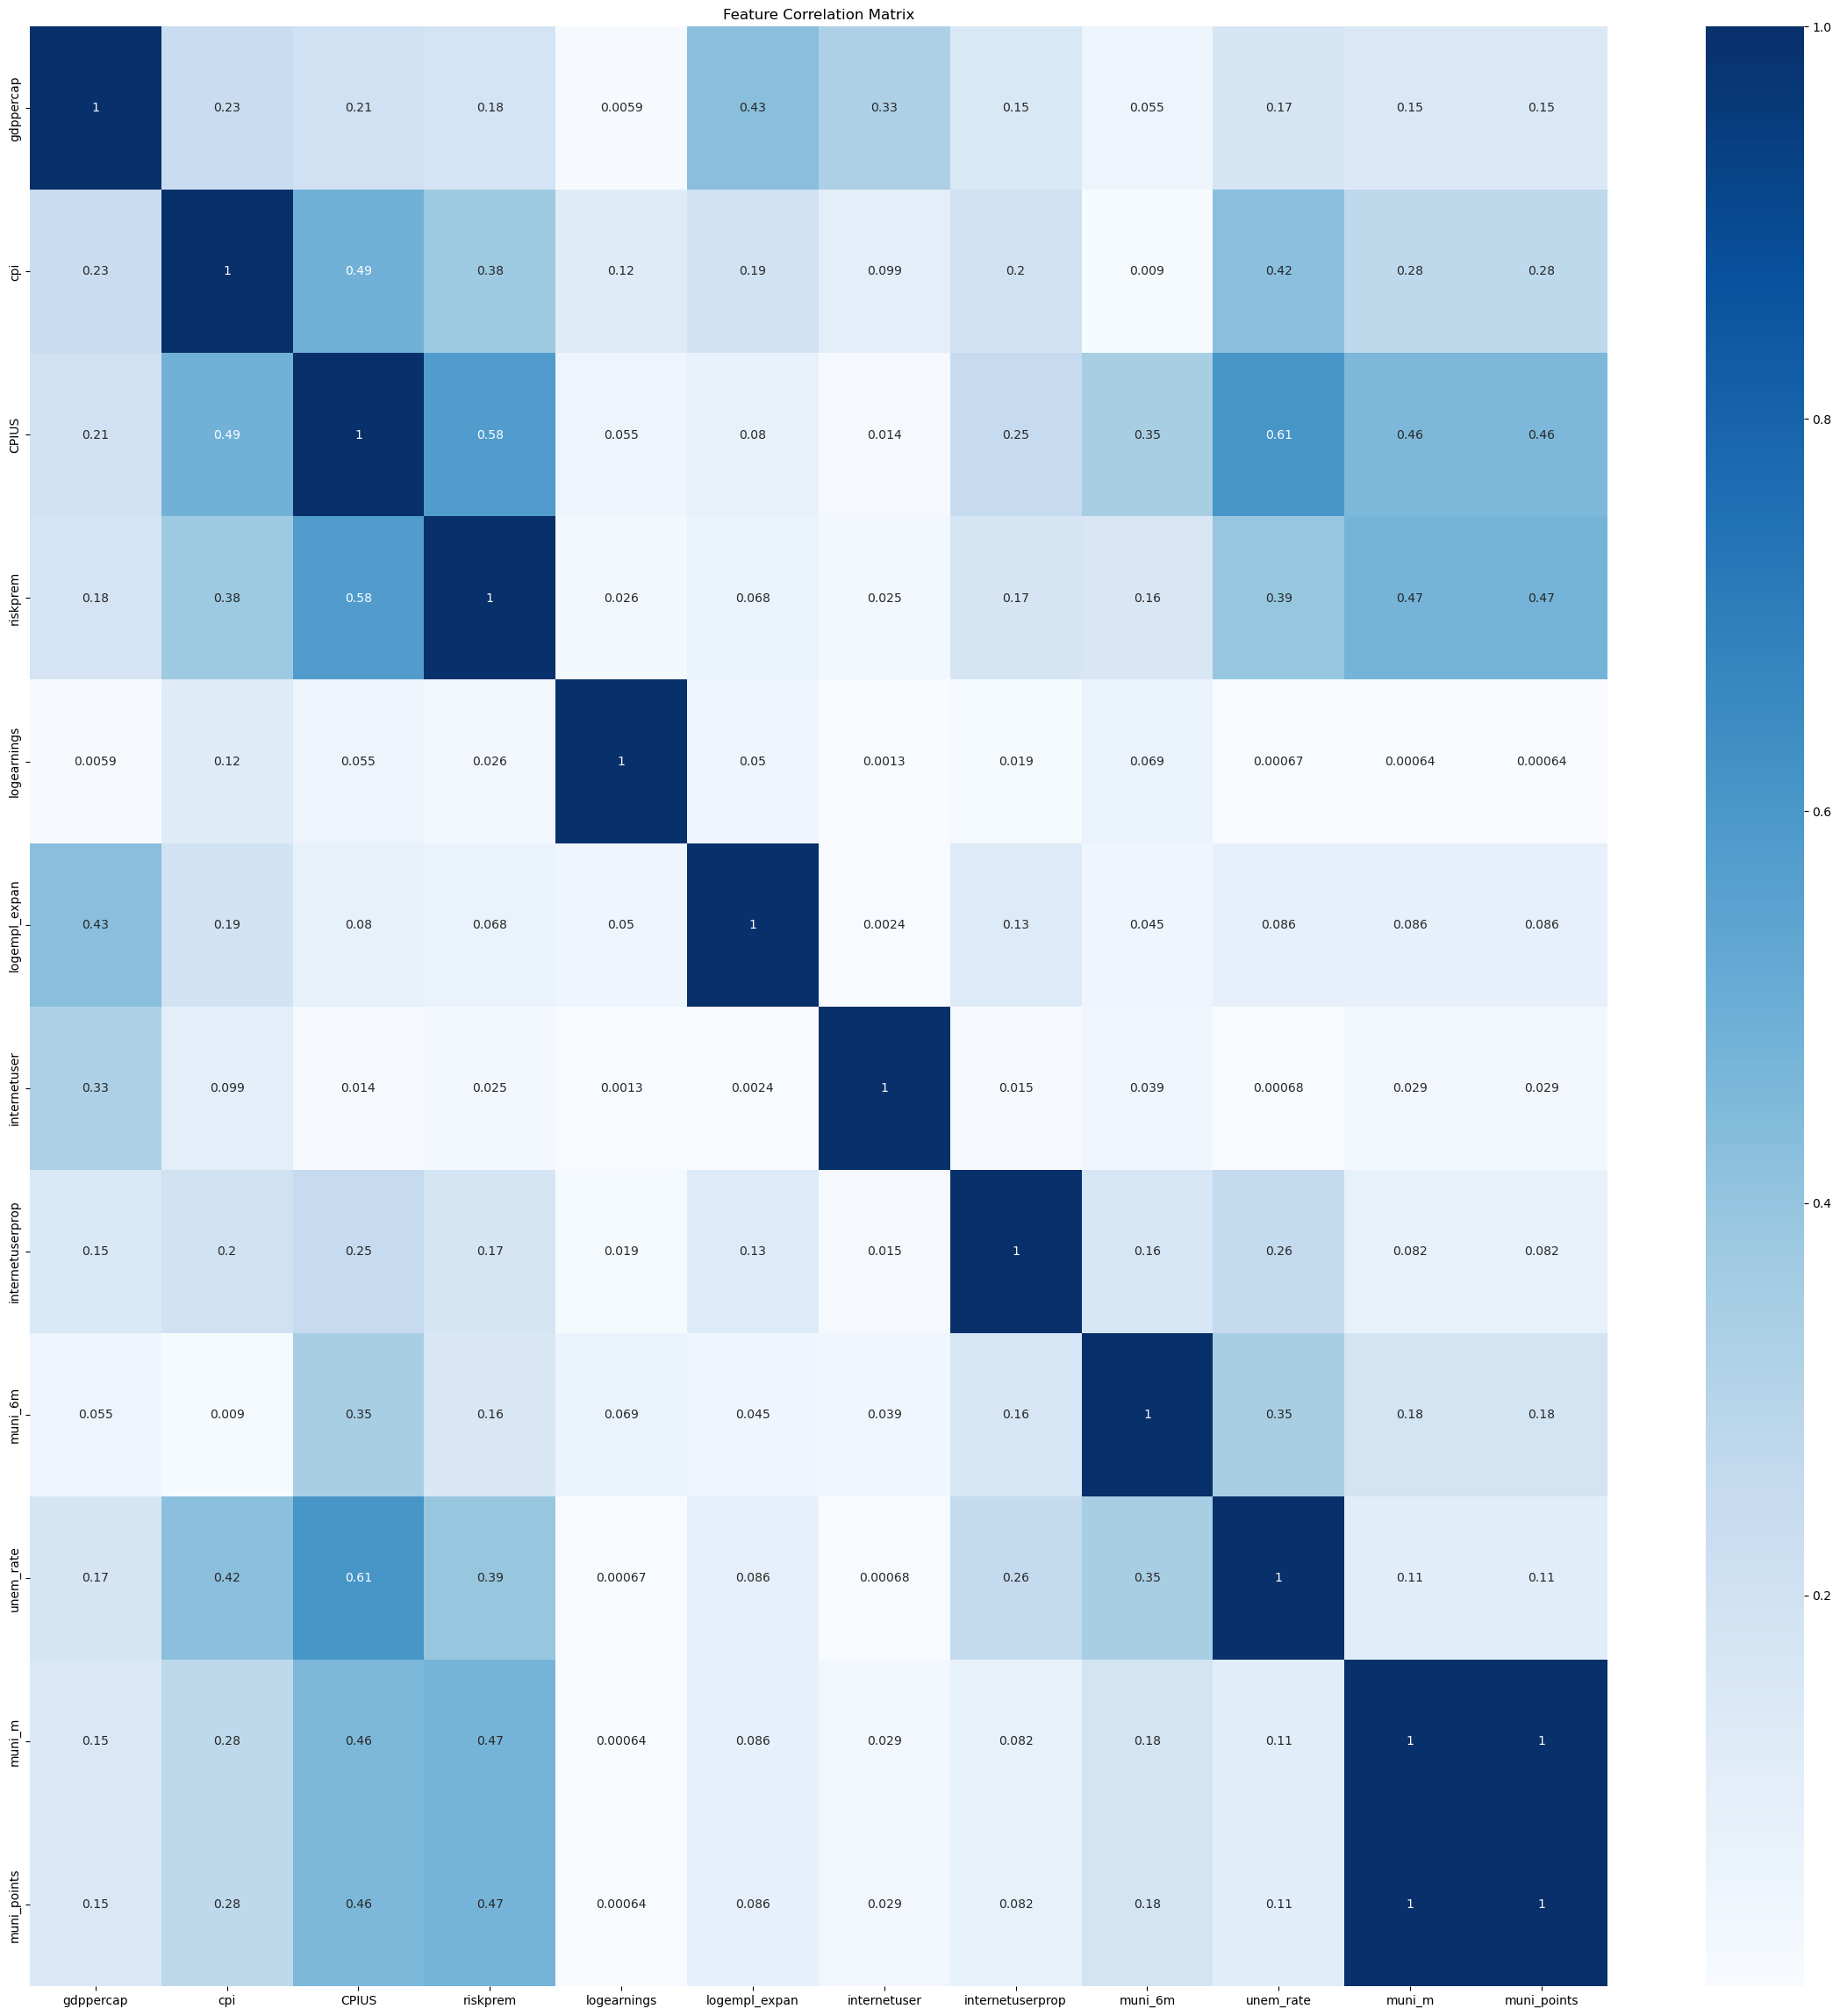

Highly correlated variables: [('muni_m', 'muni_points')]


In [264]:
# Correlation matrix
correlation_matrix_macro_1 = df[macro_list_2].select_dtypes(include='number').corr().abs()

# Plotting the correlation matrix
plt.figure(figsize=(29, 29))
sns.heatmap(correlation_matrix_macro_1[macro_list_2], annot=True, cmap='Blues')
plt.title('Feature Correlation Matrix')
plt.show()

# Identifying features with high multicollinearity
high_corr_var = np.where(np.abs(correlation_matrix_macro_1) > 0.70)
high_corr_var = [(correlation_matrix_macro_1.columns[x], correlation_matrix_macro_1.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly correlated variables:", high_corr_var)

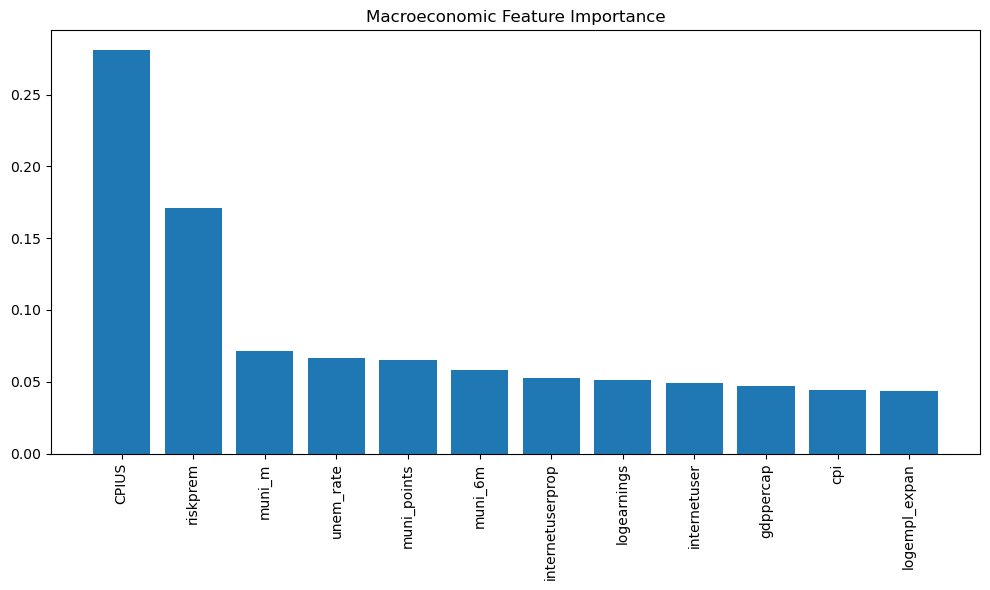

In [265]:
# Fit model
model_2 = RandomForestClassifier()
model_2.fit(df[macro_list_2], y_train)

# Feature importance
importances_2 = model_2.feature_importances_
indices_2 = np.argsort(importances_2)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.title('Macroeconomic Feature Importance')
plt.bar(range(df[macro_list_2].shape[1]), importances_2[indices_2], align='center')
plt.xticks(range(df[macro_list_2].shape[1]), df[macro_list_2].columns[indices_2], rotation=90)
plt.tight_layout()
plt.show()

In [272]:
importances_2.shape

(12,)

In [273]:
features_macro_2 = pd.DataFrame({
    'Feature': df[macro_list_2].columns,
    'Importance': importances_2
})
features_macro_2_list = features_macro_2.sort_values(by='Importance', ascending=False).head(12)
features_macro_2_list

,Feature,Importance
2,CPIUS,0.280674
3,riskprem,0.170650
10,muni_m,0.071351
9,unem_rate,0.066724
11,muni_points,0.065137
8,muni_6m,0.058434
7,internetuserprop,0.052642
4,logearnings,0.050877
6,internetuser,0.048831
0,gdppercap,0.047241


In [274]:
#macro_list_2 = ['gdpreal','gdpcontrib', 'cpi', 'inf', 'CPIUS', 'FEDFUNDS', 'riskprem', 'logearnings', 'logsocialnetworkuser', 'loginternetuser', 'logempl_expan', 'logempl_birth', 'lognew_bus', 'logpopestimate', 'logunemployment', 'internetuser', 'internetuserprop', 'empl_exp_prop', 'empl_birth', 'new_bus', 'popestimate', 'unemployment', 'muni_6m', 'unem_rate', 'muni_m', 'muni_points']
macro_list_2_to_remove = ['lognew_bus', 'empl_birth', 'FEDFUNDS', 'logempl_birth', 'logsocialnetworkuser', 'loginternetuser', 'gdpreal', 'unemployment', 'popestimate', 'inf', 'logunemployment', 'new_bus', 'gdpcontrib', 'empl_exp_prop', 'logempl_expand', 'logpopestimate', 'muni_m']
# droping above columns as they are highly correlated with other columns, also dropping them from macro_list

macro_list_2 = [element for element in macro_list_2 if element not in macro_list_2_to_remove]
len(macro_list_2)

11

In [275]:
info_col(df[macro_list_2]).head(11)

,Data type,Number of unique values,Missing values
gdppercap,float32,1226,0.0
cpi,float64,456,0.0
CPIUS,float64,94,0.0
riskprem,float64,8,0.0
logearnings,float32,3083,0.0
logempl_expan,float32,1275,0.0
internetuser,float64,1208,0.0
internetuserprop,float64,172,0.0
muni_6m,float32,962,0.0
unem_rate,float32,86,0.0


In [276]:
#df = df[base_features + dependent_variable + macro_list_2].copy()
print(df.shape)
print('Num Base features :', len(base_features))
print('Num Macro features :', len(macro_list_2))
print('Num features total:', len(base_features + dependent_variable + macro_list_2))
len(base_features + dependent_variable + macro_list_2)

(974317, 52)
Num Base features : 26
Num Macro features : 11
Num features total: 38


38

In [288]:
'loan_status' in df.columns

False

In [277]:
df = df[base_features + dependent_variable + macro_list_2].copy()

In [287]:
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [286]:
print(df.loc[:, 'loan_status_target_variable'])
df = df.loc[:, ~df.columns.duplicated(keep='first')]

         loan_status_target_variable  loan_status_target_variable
0                                  0                            0
1                                  0                            0
2                                  0                            0
3                                  1                            1
4                                  1                            1
...                              ...                          ...
2703336                            0                            0
2703350                            0                            0
2703383                            0                            0
2703384                            1                            1
2703424                            1                            1

[974317 rows x 2 columns]


In [289]:
df.to_parquet('data_preprocessed.parquet', engine='pyarrow', compression='snappy')